<a href="https://colab.research.google.com/github/kyhong0528/IT_system/blob/master/IT_%EC%8B%9C%EC%8A%A4%ED%85%9C_%EA%B3%BC%EC%A0%9C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[4.69842281e-03 1.54012819e-03]
 [9.91669103e-01 7.65442604e-05]
 [9.99843100e-01 4.14000938e-03]
 [1.12945953e-03 9.98635292e-01]
 [9.98322374e-01 1.67286405e-03]
 [1.06221453e-11 9.99999931e-01]
 [6.08491899e-03 9.95310674e-01]
 [9.98371594e-01 9.98224861e-01]]


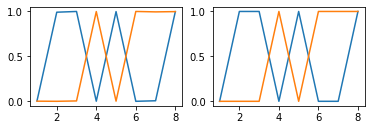

In [0]:
import numpy as np
import matplotlib.pyplot as plt

'''
sigmoid, ReLu function
'''
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def relu(x):
    return np.maximum(0, x)

def d_sigmoid(x):
    sig = sigmoid(x)
    return sig * (1 - sig)

def d_relu(x):
    return np.where(x <= 0, 0, 1)

'''
초기값 설정
'''
weights = []
layers=[4, 4, 4,2] #inputLayer, hiddenLayer, OutputLayer neuron 갯수와 hidden Layer 수
active = "sigmoid"#activate 함수 설정

if(active == "sigmoid"):#learning rate 설정
  learning_rate = 0.1
else:
  learning_rate = 0.01

'''
입력, 타겟값 설정
'''
input = np.array([[0,0,0], [0,0,1],[0,1,0],[0,1,1],
                [1,0,0],[1,0,1], [1,1,0], [1,1,1]]) #입력값
target = np.array([[0,0],[1,0],[1,0],[0,1],[1,0],[0,1],[0,1],[1,1]]) #목표값
b = np.array([[1],[1],[1],[1],[1],[1],[1],[1]]) #bias값

'''
노이즈 추가 함수
'''
def awgn(input):
    global signal
    noise = np.random.randn(8,3) #가우시안 분포를 따르는 난수 생성
    pre_signal = input + noise #AWGN잡음 생성
    signal = np.hstack((pre_signal,b)) # bias 입력

'''
가중치 초기화
'''
def init_nn(layers):
    for i in range(1, len(layers)):
      if(active == "sigmoid"):# activation 함수에 따른 가중치 초기화
               weights.append(np.random.normal(0,0.5, (layers[i - 1], layers[i])))
      else:
              
              weights.append(np.random.normal(0,1, (layers[i - 1], layers[i])))
             


'''
feed forward 함수
'''
def feed_forward(input):

        global output,pre_active,cal,cal_active
        output = [input]
        pre_active = [input]

        for i in range(1, len(layers)):

            cal = output[i-1].dot(weights[i-1]) #계산
            if(active == "sigmoid"):
              cal_active = sigmoid(cal) #activation 함수 적용
            else:
              if(i-1 == len(layers)-2 ):
                cal_active = sigmoid(cal)
              else:
                cal_active = relu(cal)


            pre_active.append(cal)
            output.append(cal_active)

        return output[len(layers)-1] #결과값


'''
back propagation 함수
'''
def back_propagate(input,target):
    pre_output = feed_forward(input)

    for i in range(len(layers)-1,1,-1):
        if i == len(layers) - 1: #cost 값 계산, gradient진행
            cost = pre_output - target
        else:
          if(active == "sigmoid"):
            cost = d_sigmoid(pre_active[i]) * (pre_cost.dot(weights[i].T))
          else:
            cost = d_relu(pre_active[i]) * (pre_cost.dot(weights[i].T))#relu지만 output은 sigmoid로 계산

        
        weights[i-1] = weights[i-1] - (learning_rate * output[i-1].T.dot(cost))
        #weight 업데이트
        pre_cost = cost

    return


'''
학습 실행
'''
awgn(input) #AWGN잡음 넣기
init_nn(layers) #가중치 초기화
pre_output = feed_forward(signal) #feed forward 실행


for i in range(10000): #back propagation 반복 실행,iteration 설정
    back_propagate(signal, target)

#출력
real_output = feed_forward(signal)
print(real_output)


#그래프로 출력
plt.subplot(221)
plt.plot([1,2,3,4,5,6,7,8], real_output)
plt.subplot(222)
plt.plot([1,2,3,4,5,6,7,8], target)
plt.show()


[array([[5.0305694e-01, 1.8087447e-02],
       [9.9996781e-01, 1.8864572e-02],
       [9.7692108e-01, 7.7131391e-03],
       [1.2686461e-02, 9.7196263e-01],
       [4.9694291e-01, 1.8720925e-02],
       [4.8026234e-02, 9.9942100e-01],
       [4.1623749e-05, 9.9999654e-01],
       [9.5521545e-01, 9.8130411e-01]], dtype=float32)]


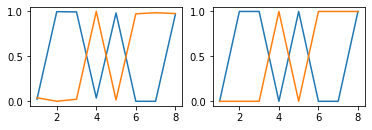

In [0]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

'''
입력, 타겟값 설정
'''
input = np.array([[0,0,0], [0,0,1],[0,1,0],[0,1,1],
                [1,0,0],[1,0,1], [1,1,0], [1,1,1]],dtype=np.float32) #입력값
target = np.array([[0,0],[1,0],[1,0],[0,1],[1,0],[0,1],[0,1],[1,1]], dtype=np.float32) #목표값
b = np.array([[1],[1],[1],[1],[1],[1],[1],[1]]) #bias

'''
초기값 설정
'''

hidden_num = 3 #hidden Layer 갯수 설정
active = "sigmoid"#activate 함수 설정
if(active == "sigmoid"):#learning rate 설정
  learning_rate = 0.1
else:
  learning_rate = 0.01

'''
노이즈 추가 함수
'''
def awgn(input):
    global signal
    noise = np.random.randn(8,3) #가우시안 분포를 따르는 난수 생성
    pre_signal = input + noise #AWGN잡음 생성
    signal = np.hstack((pre_signal,b)) # bias 입력

#입력,목표 값 들어갈 자리 설정
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

'''
activate 함수가 sigmoid, feed forward
'''
if(active == "sigmoid"):
  W_f = tf.Variable(tf.random_normal([4, 4],mean= 0 ,stddev=0.5))#가중치 초기화
  layer_f = tf.sigmoid(tf.matmul(X, W_f))

  for i in range(hidden_num-1):
    W_h = tf.Variable(tf.random_normal([4, 4],mean= 0 ,stddev=0.5))
    layer_h = tf.sigmoid(tf.matmul(X, W_h))#hidden Layer 계산

  W_o = tf.Variable(tf.random_normal([4, 2],mean= 0 ,stddev=0.5))
  output = tf.sigmoid(tf.matmul(layer_h, W_o))

'''
activate 함수가 relu, feed forward
'''
if(active == "relu"):
  W_f = tf.Variable(tf.random_normal([4, 4],mean= 0 ,stddev=1))#가중치 초기화
  layer_f = tf.nn.relu(tf.matmul(X, W_f))

  for i in range(hidden_num-1):
    W_h = tf.Variable(tf.random_normal([4, 4],mean= 0 ,stddev=1))
    layer_h = tf.nn.relu(tf.matmul(X, W_h))#hidden Layer 계산

  W_o = tf.Variable(tf.random_normal([4, 2],mean= 0 ,stddev=1))
  output = tf.sigmoid(tf.matmul(layer_h, W_o))#relu지만 output은 sigmoid로 계산

'''
back propagation
'''
cost = tf.reduce_mean(tf.reduce_sum(tf.square(output-Y))) #cost계산 
train = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) #Gradient계산


'''
tensor flow 실행
'''
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    awgn(input) #AWGN잡음 넣기
    for step in range(10000): #iteration 설정
        sess.run(train, feed_dict={X: signal, Y: target})

    real_out  = sess.run([output], feed_dict={X: signal, Y: target})
    print(real_out) #출력

#그래프로 출력
plt.subplot(221)
plt.plot([1,2,3,4,5,6,7,8], h)
plt.subplot(222)
plt.plot([1,2,3,4,5,6,7,8], target)
plt.show()

